In [144]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

In [145]:
from sklearn.datasets import make_moons
x,y = make_moons(n_samples=1000,noise=0.2)

In [146]:
df = {"x1":x[:,0],"x2":x[:,1],"y":y}
data = pd.DataFrame(df)
data.head()

,x1,x2,y
0,1.482533,-0.557946,1
1,0.333213,0.883970,0
2,1.283619,-0.456901,1
3,0.231988,1.241213,0
4,-0.221776,0.885220,0


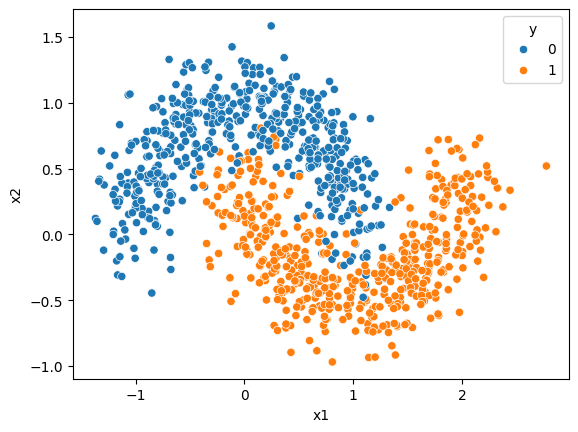

In [147]:
sns.scatterplot(x="x1",y="x2",hue='y',data=data)
plt.show()

In [148]:
x = data.iloc[:,:-1]
y = data["y"]

In [149]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt.score(x_train,y_train)*100  ,   dt.score(x_test,y_test)*100

(100.0, 94.5)

Support Vector Classifier(SVC)

In [151]:
sc = SVC()
sc.fit(x_train,y_train)
sc.score(x_train,y_train)*100   ,   sc.score(x_test,y_test)*100

(96.0, 97.5)

naive_bayes(GaussianNB)

In [152]:
gn = GaussianNB()
gn.fit(x_train,y_train)
gn.score(x_train,y_train)*100    ,   gn.score(x_test,y_test)*100

(85.875, 90.5)

VotingClassifier([DecisionTreeClassifier],  [SVC],  [GaussianNB])

In [153]:

lc = [("dt1",DecisionTreeClassifier()),("sc1",SVC()),("gn1",GaussianNB())]
vc = VotingClassifier(lc,weights=[5,4,7])
vc.fit(x_train,y_train)

,estimators,"[('dt1', ...), ('sc1', ...), ...]"
,voting,'hard'
,weights,"[5, 4, ...]"
,n_jobs,None
,flatten_transform,True
,verbose,False
,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1


In [154]:
vc.score(x_train,y_train)*100  ,  vc.score(x_test,y_test)*100

(97.125, 96.5)

BaggingClassifier

In [155]:
bg = BaggingClassifier(estimator=SVC(),n_estimators=30)
bg.fit(x_train,y_train)

,estimator,SVC()
,n_estimators,30
,max_samples,1.0
,max_features,1.0
,bootstrap,True
,bootstrap_features,False
,oob_score,False
,warm_start,False
,n_jobs,None
,random_state,None
,verbose,0


In [156]:
bg.score(x_train,y_train)*100 , bg.score(x_test,y_test)*100

(95.875, 97.5)

RandomForestClassifier

In [157]:
rf = RandomForestClassifier(n_estimators=30)
rf.fit(x_train,y_train)

,n_estimators,30
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [158]:
rf.score(x_test,y_test)*100  , rf.score(x_test,y_test)*100

(96.0, 96.0)

In [184]:
data = pd.DataFrame({"Decision_Tree":[dt.score(x_train,y_train)*100 , dt.score(x_test,y_test)*100],
                    "SVC":[sc.score(x_train,y_train)*100 , sc.score(x_test,y_test)*100],
                    "GaussianNB":[gn.score(x_train,y_train)*100 , gn.score(x_test,y_test)*100],
                    "Bagging":[bg.score(x_train,y_train)*100 , bg.score(x_test,y_test)*100],
                    "RandomForest":[rf.score(x_test,y_test)*100  , rf.score(x_test,y_test)*100]})
data

,Decision_Tree,SVC,GaussianNB,Bagging,RandomForest
0,100.0,96.0,85.875,95.875,96.0
1,94.5,97.5,90.500,97.500,96.0
